<a href="https://colab.research.google.com/github/Rony-crypto/Data_Analysis_Projects/blob/main/Analysis%20of%20Data%20Science%20Jobs/analysis_of_data_science_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
!pip install -U kaleido

In [82]:
#importing the dataset

df = pd.read_csv('/content/drive/MyDrive/Porfolio Projects/Analysis of Data Science Jobs/DataScientist.csv')
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [83]:
print(df.isnull().sum()) #checking for null values in the dataset
print(df.info()) #checking the general information of the dataset: non-null count, d-type, etc

Unnamed: 0           0
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Head

In [84]:
df['Easy Apply'] = df['Easy Apply'].fillna(False).astype(bool) #As seen in dataset, Easy Apply column has -1 values, replacing them with boolean value False
df['Easy Apply'].value_counts() # Checking for value count of Easy Apply column

True    3909
Name: Easy Apply, dtype: int64

# **1. Data Cleaning**

**Replacing -1 with nan**

In [85]:

df.replace(['-1'], [np.nan], inplace=True)
df.replace(['-1.0'], [np.nan], inplace=True)
df.replace([-1], [np.nan], inplace=True)


In [86]:
df.isnull().sum()  #After replacing -1 with nan, we can see that there are null values in the dataset

Unnamed: 0              0
index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                409
Company Name            0
Location                0
Headquarters          240
Size                  229
Founded               977
Type of ownership     229
Industry              546
Sector                546
Revenue               229
Competitors          2760
Easy Apply              0
dtype: int64

**Creating separate columns of Salary Estimate as minimum and maximum salary**

In [87]:
df_salary = df['Salary Estimate'].str.split("-",expand=True,)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K',' ')


maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', ' ')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)

In [88]:
maximum_salary.value_counts()

144    120
175     93
151     92
140     90
122     90
      ... 
53       7
185      7
173      6
26       3
74       1
Name: 1, Length: 97, dtype: int64

In [89]:
df['Minimum Salary'] = minimum_salary
df['Maximum Salary'] = maximum_salary

df.drop('Salary Estimate',axis = 1,inplace = True)

In [90]:
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ')

**Making city and state columns for both Location and Headquaters**

In [91]:
Location = df['Location'].str.split(",",expand=True,)
Location_City = Location[0]
Location_State = Location[1]
df['Location City'] = Location_City
df['Location State'] = Location_State
df.drop('Location',axis = 1, inplace = True)

HQ = df['Headquarters'].str.split(",",expand=True)
Headquarters_City = HQ[0]
Headquarters_State = HQ[1]
df['Headquarters City'] = Headquarters_City
df['Headquarters State'] = Headquarters_State
df.drop('Headquarters',axis = 1, inplace = True)


**Separating department and from job title column**

In [92]:
department = df['Job Title'].str.split(',', expand = True)
df['Job Title'], df['Department'] = department[0],department[1]

Since, department has too many missing values (2023/2253), it can be dropped.

In [93]:
df.drop('Department',1, inplace = True)

In [94]:
df['Job Title'].value_counts()


Data Scientist                                       335
Data Engineer                                        268
Data Analyst                                         264
Senior Data Scientist                                104
Senior Data Analyst                                   52
                                                    ... 
Principal Device Modeling Engineer                     1
SQL/SAS Data Analyst                                   1
Marketing Data Analyst Coordinator                     1
Greenplum /Big Data Engineer/Architect                 1
Patient Safety Physician or Safety Scientist - UK      1
Name: Job Title, Length: 1797, dtype: int64

In [95]:
df['Job Title'] = df['Job Title'].str.replace('Sr.', 'Senior')

Checking values from the columns for cleaning

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3909 non-null   float64
 1   index               3909 non-null   float64
 2   Job Title           3909 non-null   object 
 3   Job Description     3909 non-null   object 
 4   Rating              3500 non-null   float64
 5   Company Name        3909 non-null   object 
 6   Size                3680 non-null   object 
 7   Founded             2932 non-null   float64
 8   Type of ownership   3680 non-null   object 
 9   Industry            3363 non-null   object 
 10  Sector              3363 non-null   object 
 11  Revenue             3680 non-null   object 
 12  Competitors         1149 non-null   object 
 13  Easy Apply          3909 non-null   bool   
 14  Minimum Salary      3909 non-null   int64  
 15  Maximum Salary      3909 non-null   int64  
 16  Locati

In [97]:
df['Type of ownership'].value_counts()

Company - Private                 1933
Company - Public                  1114
Nonprofit Organization             207
Subsidiary or Business Segment     160
Government                          91
College / University                77
Unknown                             38
Contract                            17
Hospital                            16
Private Practice / Firm             12
School / School District             5
Other Organization                   5
Self-employed                        4
Franchise                            1
Name: Type of ownership, dtype: int64

In [98]:
df['Industry'].value_counts()

IT Services                             472
Staffing & Outsourcing                  313
Biotech & Pharmaceuticals               293
Computer Hardware & Software            264
Internet                                238
                                       ... 
Commercial Equipment Rental               1
Metals Brokers                            1
Truck Rental & Leasing                    1
Beauty & Personal Accessories Stores      1
Auto Repair & Maintenance                 1
Name: Industry, Length: 95, dtype: int64

In [99]:
df['Sector'].value_counts()

Information Technology                1124
Business Services                      679
Biotech & Pharmaceuticals              293
Finance                                270
Health Care                            197
Insurance                              109
Education                              101
Manufacturing                           87
Government                              82
Media                                   75
Retail                                  72
Accounting & Legal                      71
Aerospace & Defense                     37
Oil, Gas, Energy & Utilities            34
Telecommunications                      21
Consumer Services                       20
Non-Profit                              18
Construction, Repair & Maintenance      16
Transportation & Logistics              16
Real Estate                             12
Arts, Entertainment & Recreation        10
Restaurants, Bars & Food Services        9
Agriculture & Forestry                   5
Travel & To

In [100]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            1163
$10+ billion (USD)                   599
$100 to $500 million (USD)           338
$50 to $100 million (USD)            214
$2 to $5 billion (USD)               211
$10 to $25 million (USD)             191
$1 to $2 billion (USD)               180
$1 to $5 million (USD)               170
$25 to $50 million (USD)             143
$5 to $10 billion (USD)              133
Less than $1 million (USD)           124
$500 million to $1 billion (USD)     114
$5 to $10 million (USD)              100
Name: Revenue, dtype: int64

**Cleaning the Revenue column**

In [101]:
df['Revenue'] = df['Revenue'].replace('Unknown / Non-Applicable', None)
# data['Revenue']=data['Revenue'].replace('Unknown / Non-Applicable', None)

In [102]:
df['Revenue'] = df['Revenue'].str.replace('$', ' ')
df['Revenue'] = df['Revenue'].str.replace('(USD)', ' ')
df['Revenue'] = df['Revenue'].str.replace('(', ' ')
df['Revenue'] = df['Revenue'].str.replace(')', ' ')
df['Revenue'] = df['Revenue'].str.replace(' ', '')

In [103]:
df['Revenue'].value_counts()

10+billion                832
100to500million           484
2to5billion               300
50to100million            292
10to25million             266
1to2billion               257
1to5million               235
25to50million             213
5to10billion              198
Lessthan1million          189
500millionto1billion      170
5to10million              137
Unknown/Non-Applicable     11
Name: Revenue, dtype: int64

In [104]:
df['Revenue'] = df['Revenue'].str.replace('2to5billion', '2billionto5billion')
df['Revenue'] = df['Revenue'].str.replace('5to10billion ', '5billionto10billion ')


In [105]:
df['Revenue'].value_counts()

10+billion                832
100to500million           484
2billionto5billion        300
50to100million            292
10to25million             266
1to2billion               257
1to5million               235
25to50million             213
5to10billion              198
Lessthan1million          189
500millionto1billion      170
5to10million              137
Unknown/Non-Applicable     11
Name: Revenue, dtype: int64

In [106]:
df['Revenue'] = df['Revenue'].replace('million', ' ')
df['Revenue'] = df['Revenue'].replace('10+billion', '10billionto11billion')
df['Revenue'] = df['Revenue'].str.replace('Lessthan1million', '0millionto1million')

In [107]:
df['Revenue'].value_counts()

10billionto11billion      832
100to500million           484
2billionto5billion        300
50to100million            292
10to25million             266
1to2billion               257
1to5million               235
25to50million             213
5to10billion              198
0millionto1million        189
500millionto1billion      170
5to10million              137
Unknown/Non-Applicable     11
Name: Revenue, dtype: int64

In [108]:
df['Revenue'] = df['Revenue'].str.replace('million', ' ')
df['Revenue'] = df['Revenue'].str.replace('billion', '000 ')
df['Revenue'] = df['Revenue'].replace('Unknown/Non-Applicable', np.nan)

In [109]:
df['Revenue'].value_counts()


10000 to11000     832
100to500          484
2000 to5000       300
50to100           292
10to25            266
1to2000           257
1to5              235
25to50            213
5to10000          198
0 to1             189
500 to1000        170
5to10             137
Name: Revenue, dtype: int64

In [110]:
Revenue = df['Revenue'].str.split("to",expand=True)

In [111]:
df['Revenue'].value_counts()

10000 to11000     832
100to500          484
2000 to5000       300
50to100           292
10to25            266
1to2000           257
1to5              235
25to50            213
5to10000          198
0 to1             189
500 to1000        170
5to10             137
Name: Revenue, dtype: int64

**Creating two separate columns of Revenue as Minimum and Maximum Revenue**

In [112]:
df['Minimum Revenue'] = Revenue[0]
df['Maximum Revenue'] = Revenue[1]


In [113]:
df['Maximum Revenue'] = pd.to_numeric(df['Maximum Revenue'])
df['Minimum Revenue'] = pd.to_numeric(df['Minimum Revenue'])

In [114]:
df.drop('Revenue',1,inplace=True)

In [115]:
df

,Unnamed: 0,index,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,...,Competitors,Easy Apply,Minimum Salary,Maximum Salary,Location City,Location State,Headquarters City,Headquarters State,Minimum Revenue,Maximum Revenue
0,0.0,0.0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,501 to 1000 employees,2007.0,Company - Private,Travel Agencies,...,NaN,True,111,181,New York,NY,Montreal,Canada,NaN,NaN
1,1.0,1.0,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US,1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",...,NaN,True,111,181,New York,NY,New York,NY,NaN,NaN
2,2.0,2.0,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,1 to 50 employees,NaN,Unknown,NaN,...,NaN,True,111,181,New York,NY,New York,NY,NaN,NaN
3,3.0,3.0,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,201 to 500 employees,2019.0,Company - Private,Internet,...,"Zocdoc, Healthgrades",True,111,181,Lyndhurst,NJ,Lyndhurst,NJ,NaN,NaN
4,4.0,4.0,Director,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,...,"BBDO, Grey Group, Droga5",True,111,181,New York,NY,New York,NY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904.0,4375.0,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,201 to 500 employees,2011.0,Company - Private,IT Services,...,NaN,True,55,112,Dublin,OH,Irving,TX,10.0,25.0
3905,3905.0,4376.0,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC",51 to 200 employees,2008.0,Company - Private,IT Services,...,NaN,True,55,112,Columbus,OH,Woodridge,IL,50.0,100.0
3906,3906.0,4377.0,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.",5001 to 10000 employees,1977.0,Company - Private,Staffing & Outsourcing,...,NaN,True,55,112,Dublin,OH,Irving,TX,100.0,500.0
3907,3907.0,4378.0,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,1 to 50 employees,NaN,Company - Private,Accounting,...,NaN,True,55,112,Dublin,OH,Omaha,NE,0.0,1.0


**Cleaning the Size column**

In [116]:
df['Size'].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
5001 to 10000 employees    219
Unknown                     77
Name: Size, dtype: int64

In [117]:
df['Size'] = df['Size'].str.replace('employees', '')


In [118]:
df['Size'] = df['Size'].str.replace('+', 'plus')
df['Size'] = df['Size'].replace('Unknown', None)



In [119]:
df['Size'] = df['Size'].str.replace('10000plus', '10000 to 10001')

In [120]:
size = df['Size'].str.split("to",expand=True)

**Creating separate columns of Size as minimum and maximum size**

In [121]:
df['Minimum Size'] = size[0]
df['Maximum Size'] = size[1]
df

,Unnamed: 0,index,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,...,Minimum Salary,Maximum Salary,Location City,Location State,Headquarters City,Headquarters State,Minimum Revenue,Maximum Revenue,Minimum Size,Maximum Size
0,0.0,0.0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,501 to 1000,2007.0,Company - Private,Travel Agencies,...,111,181,New York,NY,Montreal,Canada,NaN,NaN,501,1000
1,1.0,1.0,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US,1001 to 5000,2008.0,Company - Private,"Health, Beauty, & Fitness",...,111,181,New York,NY,New York,NY,NaN,NaN,1001,5000
2,2.0,2.0,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,1 to 50,NaN,Unknown,NaN,...,111,181,New York,NY,New York,NY,NaN,NaN,1,50
3,3.0,3.0,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,201 to 500,2019.0,Company - Private,Internet,...,111,181,Lyndhurst,NJ,Lyndhurst,NJ,NaN,NaN,201,500
4,4.0,4.0,Director,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,51 to 200,2007.0,Company - Private,Advertising & Marketing,...,111,181,New York,NY,New York,NY,NaN,NaN,51,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904.0,4375.0,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,201 to 500,2011.0,Company - Private,IT Services,...,55,112,Dublin,OH,Irving,TX,10.0,25.0,201,500
3905,3905.0,4376.0,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC",51 to 200,2008.0,Company - Private,IT Services,...,55,112,Columbus,OH,Woodridge,IL,50.0,100.0,51,200
3906,3906.0,4377.0,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.",5001 to 10000,1977.0,Company - Private,Staffing & Outsourcing,...,55,112,Dublin,OH,Irving,TX,100.0,500.0,5001,10000
3907,3907.0,4378.0,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,1 to 50,NaN,Company - Private,Accounting,...,55,112,Dublin,OH,Omaha,NE,0.0,1.0,1,50


In [122]:
df.drop('Size',1,inplace = True)

# 2. Statistics

Distribution of minimum and maximum salary of all Data Analyst job titles

No handles with labels found to put in legend.


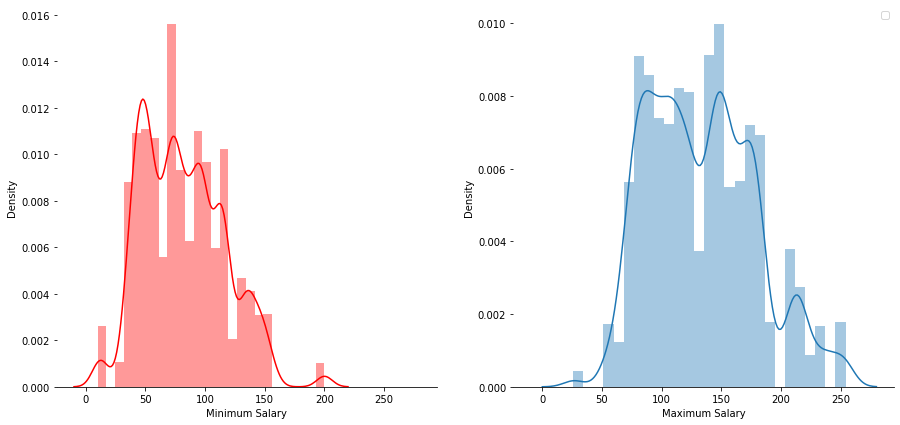

In [123]:
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.distplot(df['Minimum Salary'],color = 'r',ax = axes[0])
sns.distplot(df['Maximum Salary'],ax = axes[1])
plt.legend();

Checking for outliers in Company Ratings

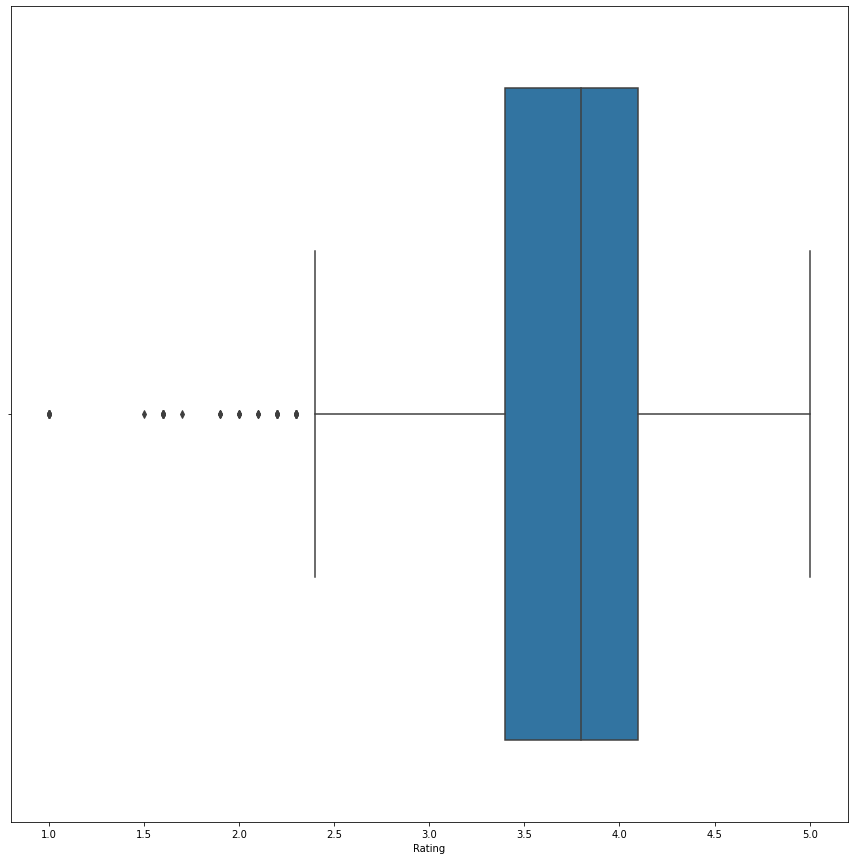

In [124]:
sns.boxplot(x = df['Rating']);

In [125]:
df['Minimum Size'] = df['Minimum Size'].astype('float')
df['Maximum Size'] = df['Maximum Size'].astype('float')

Checking for outliers in company size

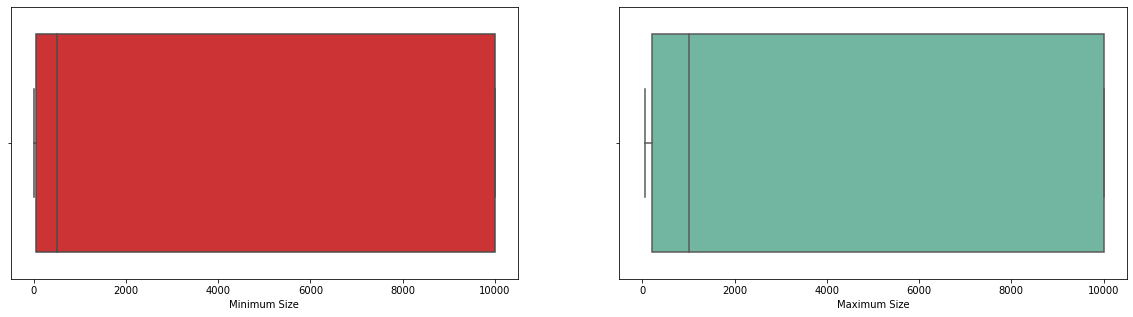

In [126]:
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
sns.boxplot(x = df['Minimum Size'], ax = axes[0],palette='Set1');
sns.boxplot(x = df['Maximum Size'], ax = axes[1],palette='Set2');

# 3. Data Visualization# 

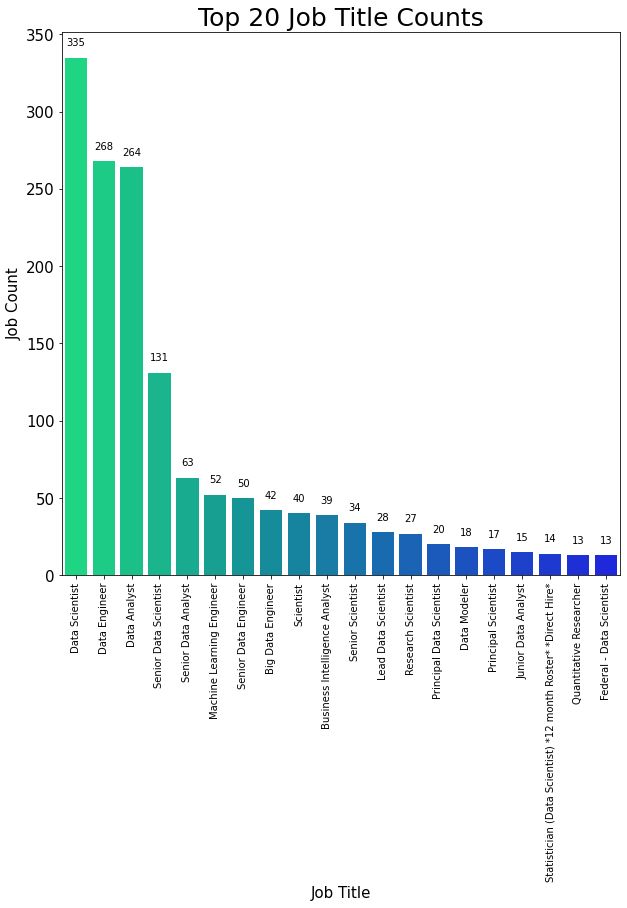

In [127]:
plt.subplots(figsize=(10,10))
splot = sns.barplot(x=df['Job Title'].value_counts()[0:20].index,y=df['Job Title'].value_counts()[0:20], palette = 'winter_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.xlabel('Job Title',fontsize=15)
plt.ylabel('Job Count',fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.title('Top 20 Job Title Counts',fontsize=25);


Creating 'Average Revenue' column

In [128]:
df['Average Revenue'] = df[['Minimum Revenue','Maximum Revenue']].mean(axis=1)


In [129]:
avg_rev = df['Average Revenue'][0:20]
avg_rev

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11    300.0
12    750.0
13    750.0
14    750.0
15    750.0
16    300.0
17    300.0
18    300.0
19    300.0
Name: Average Revenue, dtype: float64

In [130]:
data = df.groupby('Location City')[['Minimum Salary', 'Maximum Salary']].mean().sort_values(['Maximum Salary','Minimum Salary'],ascending=False).head(25)
data

,Minimum Salary,Maximum Salary
Location City,,
Queens Village,156.000000,254.000000
Rockville Centre,156.000000,254.000000
Stanford,150.000000,237.000000
Franklin Lakes,129.000000,210.000000
Port Washington,129.000000,210.000000
Duarte,132.000000,208.000000
Sherman Oaks,132.000000,208.000000
Livermore,137.500000,202.750000
Redwood City,138.750000,200.687500


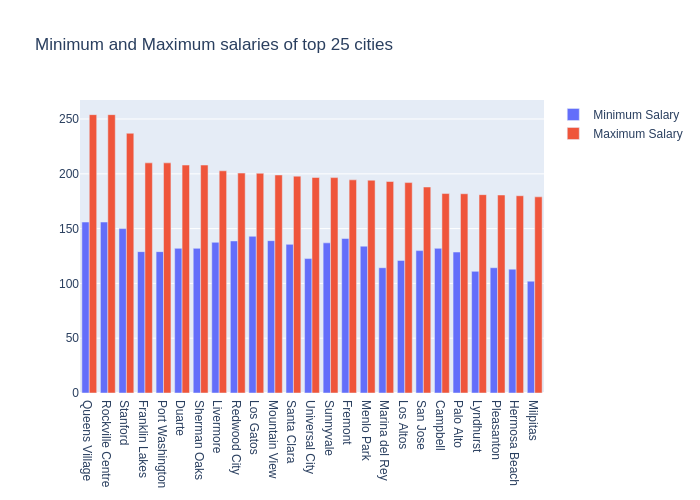

In [131]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(
   x = data.index,
   y = data['Minimum Salary'],
   name = 'Minimum Salary'
))

fig.add_trace(go.Bar(
   x = data.index,
   y = data['Maximum Salary'],
   name = 'Maximum Salary'
))

#data1 = [plot1,plot2]
fig.update_layout(title = 'Minimum and Maximum salaries of top 25 cities', barmode = 'group')
#fig = go.Figure(data = data, layout = layout)

fig.show("png")

In [132]:
data1 = df.groupby('Job Title')[['Minimum Salary', 'Maximum Salary']].mean().sort_values(['Maximum Salary','Minimum Salary'],ascending=False).head(25)
data1

,Minimum Salary,Maximum Salary
Job Title,,
Data Science Analyst/Engineer,156.000000,254.000000
Deployed Data Scientist,156.000000,254.000000
NLP Machine Learning Engineer,156.000000,254.000000
Community Data Manager,200.000000,250.000000
Data Scientist Machine Learning at Google,200.000000,250.000000
Data science researcher,200.000000,250.000000
NLP Data Scientist,200.000000,250.000000
Principal Data Scientist-Recommendation Systems,200.000000,250.000000
Senior Data Scientist - Platform Manipulation,200.000000,250.000000


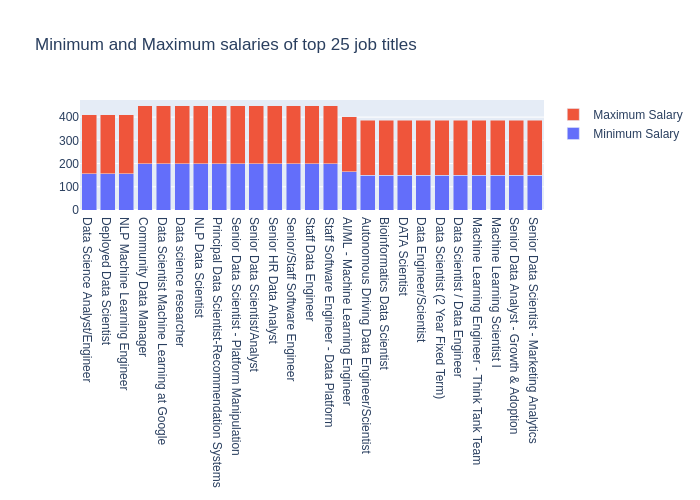

In [133]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(
   x = data1.index,
   y = data1['Minimum Salary'],
   name = 'Minimum Salary'
))

fig.add_trace(go.Bar(
   x = data1.index,
   y = data1['Maximum Salary'],
   name = 'Maximum Salary'
))

#data1 = [plot1,plot2]
fig.update_layout(title = 'Minimum and Maximum salaries of top 25 job titles', barmode = 'stack')
#fig = go.Figure(data = data, layout = layout)

fig.show("png")

In [134]:
df['Average Salary'] = df[['Minimum Salary', 'Maximum Salary']].mean(axis = 1)

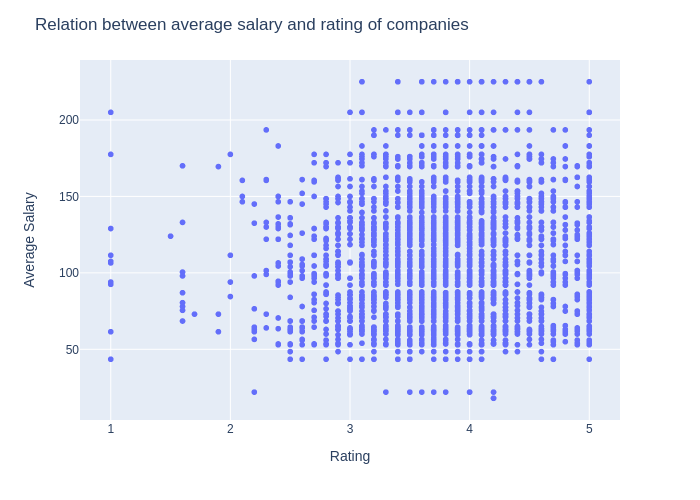

In [135]:
import plotly.express as px
fig = px.scatter(df, x=df['Rating'], y= df['Average Salary'])
fig.update_layout(title = 'Relation between average salary and rating of companies')
fig.show("png")


In [136]:
data3 = df.groupby('Founded')[['Average Revenue']].mean().sort_values(['Average Revenue'],ascending=False).tail(25)
data3

,Average Revenue
Founded,
1924.0,1000.500000
1999.0,996.467890
1990.0,996.014706
2005.0,993.811321
1949.0,940.000000
1900.0,875.250000
1974.0,791.750000
1920.0,750.000000
2002.0,673.010000


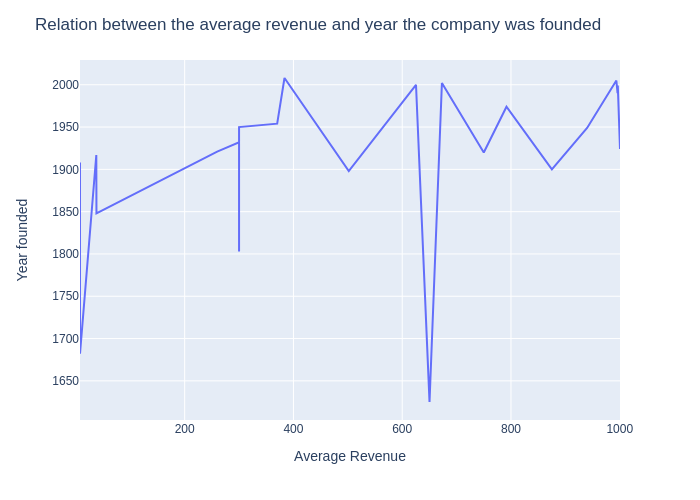

In [137]:
fig = px.line(x=data3['Average Revenue'], y=data3.index, labels={'x':'Average Revenue', 'y':'Year founded'})
fig.update_layout(title = 'Relation between the average revenue and year the company was founded')
fig.show("png")

In [138]:
data4 = pd.DataFrame(df['Sector'].value_counts())
data4

,Sector
Information Technology,1124
Business Services,679
Biotech & Pharmaceuticals,293
Finance,270
Health Care,197
Insurance,109
Education,101
Manufacturing,87
Government,82
Media,75


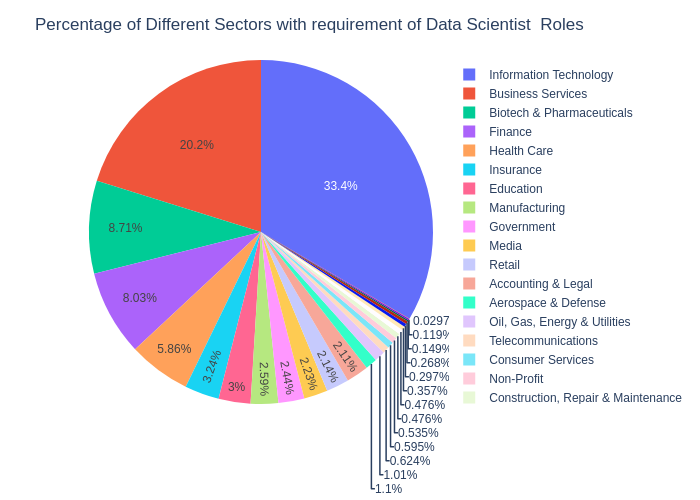

In [139]:
import plotly.express as px
fig = px.pie(data4, values=data4['Sector'], names=data4.index)
fig.update_layout(title = 'Percentage of Different Sectors with requirement of Data Scientist  Roles')
fig.show("png")

In [140]:
data5 = pd.DataFrame(df['Industry'].value_counts().head(25))
data5

,Industry
IT Services,472
Staffing & Outsourcing,313
Biotech & Pharmaceuticals,293
Computer Hardware & Software,264
Internet,238
Health Care Services & Hospitals,197
Consulting,166
Enterprise Software & Network Solutions,150
Investment Banking & Asset Management,109
Advertising & Marketing,93


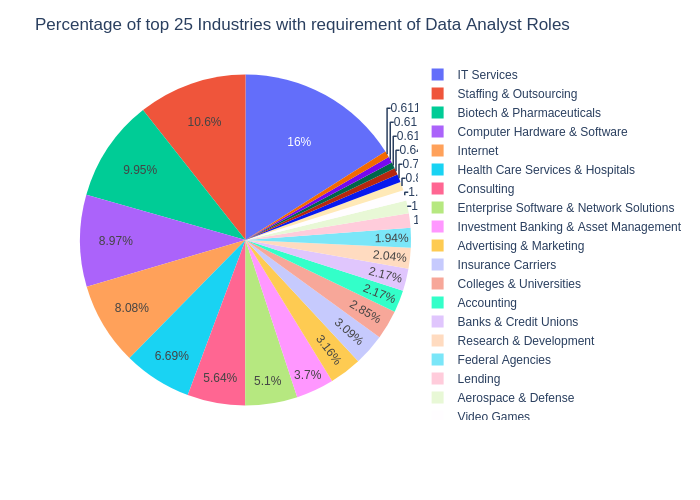

In [141]:
fig = px.pie(data5, values=data5['Industry'], names=data5.index)
fig.update_layout(title = 'Percentage of top 25 Industries with requirement of Data Analyst Roles')
fig.show("png")

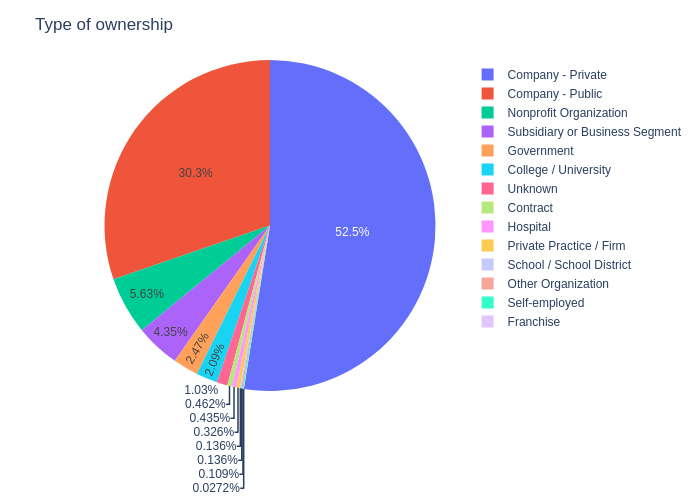

In [142]:
data6 = pd.DataFrame(df['Type of ownership'].value_counts())
data6
fig = px.pie(data6, values=data6['Type of ownership'], names=data6.index)
fig.update_layout(title = 'Type of ownership')
fig.show("png")

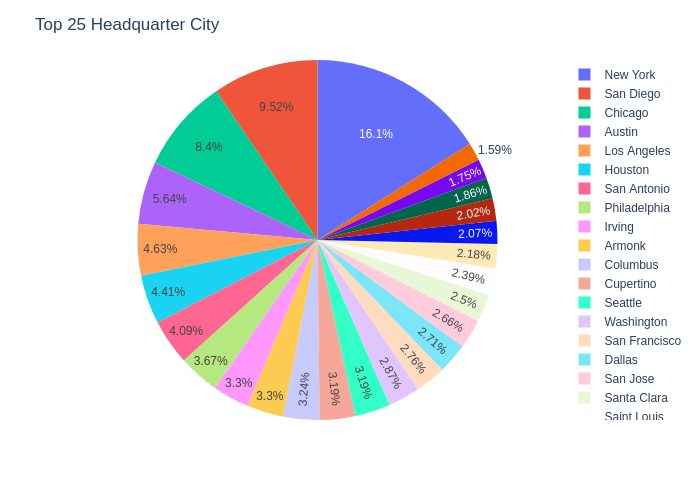

In [143]:
data7 = pd.DataFrame(df['Headquarters City'].value_counts().head(25))
data7
fig = px.pie(data7, values=data7['Headquarters City'], names=data7.index)
fig.update_layout(title = 'Top 25 Headquarter City')
fig.show("png")

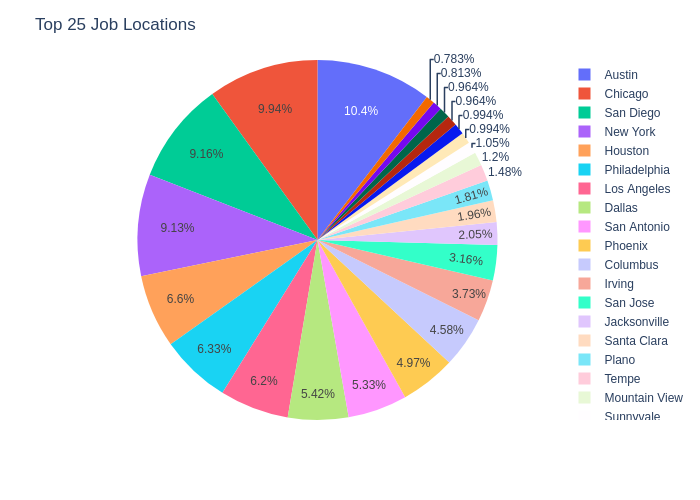

In [144]:
data8 = pd.DataFrame(df['Location City'].value_counts().head(25))
data8

fig = px.pie(data8, values=data8['Location City'], names=data8.index)
fig.update_layout(title = 'Top 25 Job Locations')
fig.show("png")

<h2> Word Cloud of Job Titles <h2>

In [145]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

<h3>1. Job Title </h3>

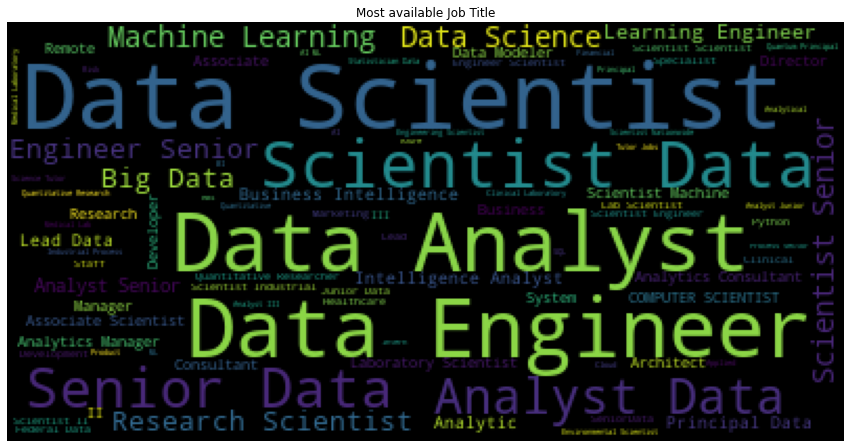

In [146]:
plt.subplots(figsize=(15,15))
wc = WordCloud()
text = df['Job Title']
wc.generate(str(' '.join(text)))
plt.imshow(wc)
plt.axis("off")
plt.title("Most available Job Title")
plt.show()

So, Data Scientist, Data Engineer, Data Analyst, Senior Data Scientist are the most available jobs.
<h3>2. Company Name</h3>

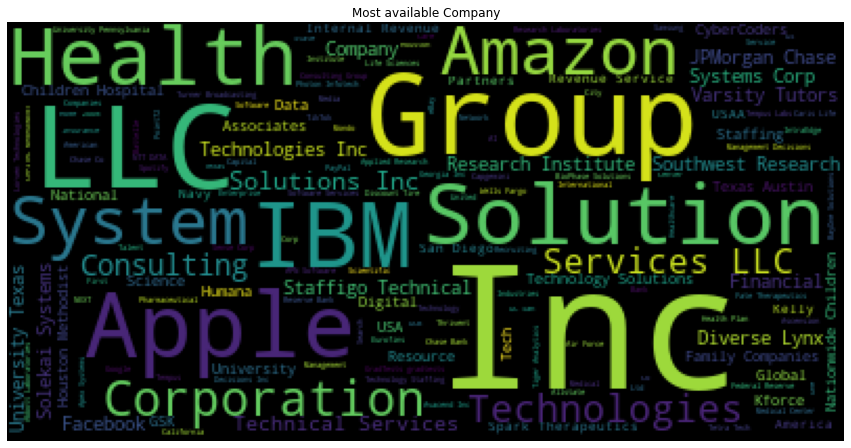

In [147]:
plt.subplots(figsize=(15,15))
wc = WordCloud()
text = df["Company Name"]
wc.generate(str(' '.join(text)))
plt.imshow(wc)
plt.axis("off")
plt.title("Most available Company")
plt.show()

<h3>3. Head Quarters</h3>

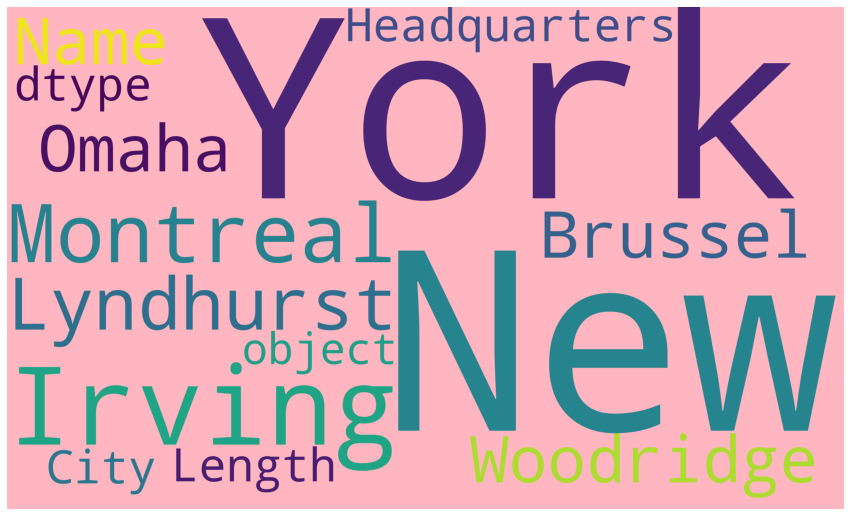

In [148]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightpink',
                      height =3000,
                      width = 5000
                     ).generate(str(df["Headquarters City"]))
plt.rcParams['figure.figsize'] = (15,15)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [149]:
usa_map = df.groupby('Location City')[['Minimum Salary', 'Maximum Salary']].mean().sort_values(['Maximum Salary','Minimum Salary'],ascending=False)
usa_map = usa_map.reset_index()
usa_map.head(20)


,Location City,Minimum Salary,Maximum Salary
0,Queens Village,156.000000,254.000000
1,Rockville Centre,156.000000,254.000000
2,Stanford,150.000000,237.000000
3,Franklin Lakes,129.000000,210.000000
4,Port Washington,129.000000,210.000000
5,Duarte,132.000000,208.000000
6,Sherman Oaks,132.000000,208.000000
7,Livermore,137.500000,202.750000
8,Redwood City,138.750000,200.687500
9,Los Gatos,143.000000,200.500000


In [150]:
cities = usa_map['Location City']
cities.head(20)

['Daly City','Marin City', 'Los Gatos', 'Berkeley', 'San Jose', 'Cupertino','Santa Clara', 'Pico Rivera', 'Whittier','Far Rockaway', 'Secaucus', 'Sunnyvale', 'Menlo Park', 'Elk Grove Village', 'Glenview', 'Maywood', 'Northfield', 'Stanford', 'San Francisco', 'El Cajon']

['Daly City',
 'Marin City',
 'Los Gatos',
 'Berkeley',
 'San Jose',
 'Cupertino',
 'Santa Clara',
 'Pico Rivera',
 'Whittier',
 'Far Rockaway',
 'Secaucus',
 'Sunnyvale',
 'Menlo Park',
 'Elk Grove Village',
 'Glenview',
 'Maywood',
 'Northfield',
 'Stanford',
 'San Francisco',
 'El Cajon']

Creating a new DataFrame 'use_maps' consisting of 'Location State', 'Minimum Salary' and 'Maximum Salary' columns for ploting choropleth map for top 20 states with maximum salary.

In [151]:
usa_maps = df.groupby('Location State')[['Minimum Salary', 'Maximum Salary']].mean().sort_values(['Maximum Salary','Minimum Salary'],ascending=False)
usa_maps = usa_maps.reset_index()

usa_maps = usa_maps.drop([3, 0])
usa_maps

,Location State,Minimum Salary,Maximum Salary
1,CA,103.819457,161.746492
2,NY,112.316294,159.038339
4,United Kingdom,71.000000,128.250000
5,TX,69.146049,121.548284
6,OH,66.694915,121.491525
7,PA,69.299383,120.052469
8,AZ,75.105085,119.593220
9,IL,62.212121,107.796143
10,FL,58.608696,96.086957


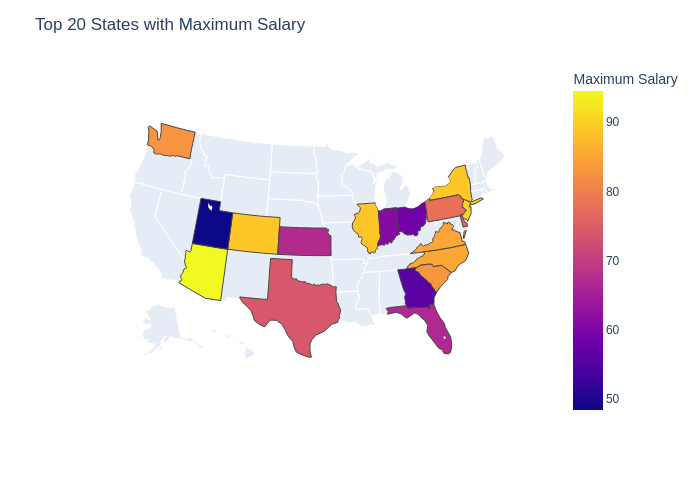

In [152]:
import plotly.express as px

fig = px.choropleth(locations= ['AZ','NJ','NY','CO','IL','NC','VA','SC','WA','PA','DE','TX','KS','FL','IN','OH','GA','UT'], 
                    locationmode="USA-states", 
                    color=[94.494845, 90.232558, 89.026087, 89.022727, 88.829268,85.233333, 85.125000, 83.000000, 82.759259, 77.824561, 75.909091, 74.116751, 67.000000, 66.666667, 61.000000, 58.800000, 56.000000, 48.454545],
                    labels={'color':'Maximum Salary', 'locations':'State'},
                    scope="usa") 


fig.update_layout(
    
    title_text = 'Top 20 States with Maximum Salary',
    geo_scope='usa'
)
fig.show("png")